## Task 1: Dataset Generation 
### Logistic Regression
Logistic Regression Assumptions and Characteristics:

- First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

- Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

- Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  Meaning, that the independent variables should not be too highly correlated with each other.

- Fourth, logistic regression assumes linearity of independent variables and log odds of the dependent variable. Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds of the dependent variable.


- Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

Having the premise of linearity of the independent variables and log odds of the depedndent variable. We create a linear logit function = logit = beta_0 + beta_1 * X1 + beta_2 * X2. Where beta_0 is the intercept (or bias term) and beta_1 and beta_2 are the coefficients (weights) for the predictors X1 and X2.

The logit(P(Y==1)) = log(P(Y==1)/(1-P(Y==1))), therefore we need to make probabilities out of the outcomes of the logit function using the logistic function. Now that we have the probability we can create the output set.




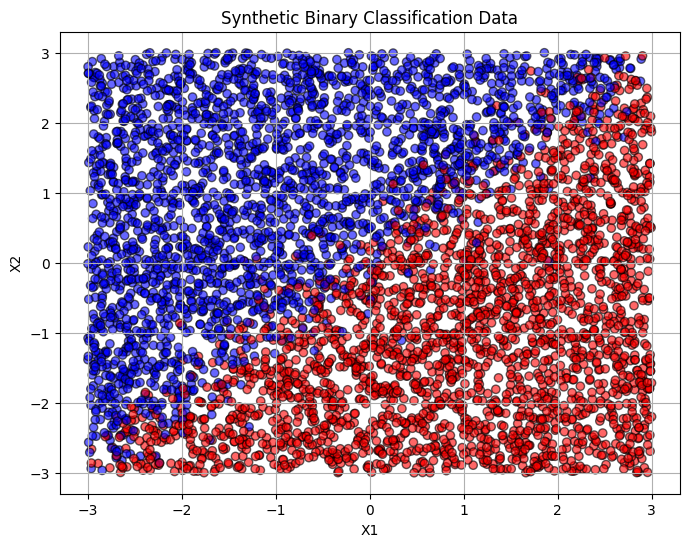

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Step 1: Generate data
np.random.seed(42)
n = 5000
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)
noise = np.random.normal(0, 0.5, n)
y = (X1 - X2 + noise > 0).astype(int)

# Combine features
X = np.vstack((X1, X2)).T

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, c=y, cmap='bwr', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Binary Classification Data')
plt.grid(True)
plt.show()


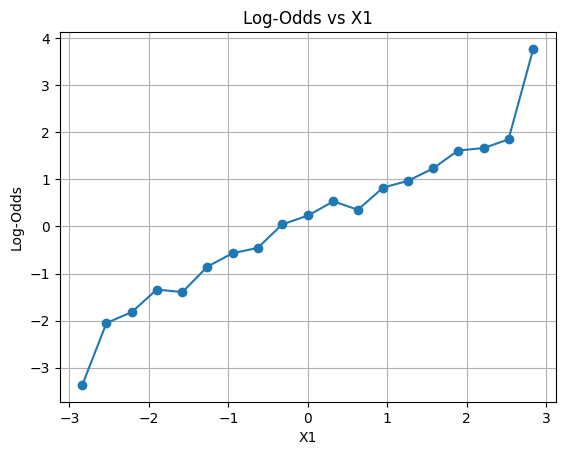

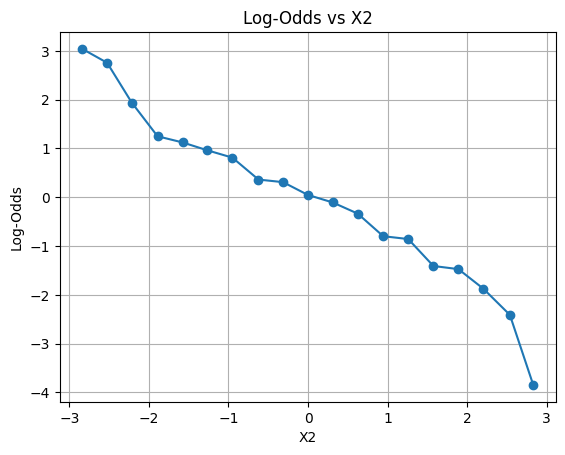

In [71]:
def plot_log_odds(X_feature, y, feature_name):
    bins = np.linspace(X_feature.min(), X_feature.max(), 20)
    digitized = np.digitize(X_feature, bins)
    log_odds = []
    bin_centers = []

    for i in range(1, len(bins)):
        y_bin = y[digitized == i]
        if len(y_bin) > 0 and np.any(y_bin) and np.any(y_bin == 0):
            p = np.mean(y_bin)
            odds = p / (1 - p)
            log_odds.append(np.log(odds))
            bin_centers.append(np.mean(X_feature[digitized == i]))

    plt.plot(bin_centers, log_odds, marker='o')
    plt.xlabel(feature_name)
    plt.ylabel('Log-Odds')
    plt.title(f'Log-Odds vs {feature_name}')
    plt.grid(True)
    plt.show()

plot_log_odds(X1, y, 'X1')
plot_log_odds(X2, y, 'X2')


In [72]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {acc:.3f}")


Logistic Regression Test Accuracy: 0.936


In [74]:
# 5-fold cross-validation accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean:.3f}")


5-Fold Cross-Validation Accuracy: 0.940


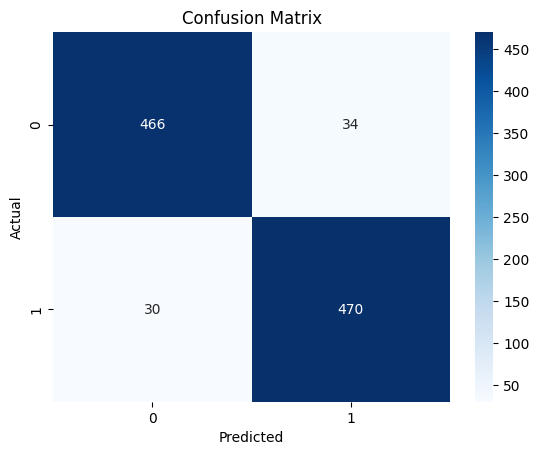

In [75]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Why This Dataset is Hard to Beat
- Logistic Regression fits perfectly since it assumes a linear decision boundary. Also, the relationship of each independent variable with the log odds of the dependent variable is linear.
- Moreover, add some noise which Linear Regression will work fine around, but for example a Linear SVM wont be able to determine the max margins because of it

### Linear Discriminant Analysis - LDA
LDA Assumptions and Characteristics
- The input dataset has a Gaussian distribution, where plotting the data points gives a bell-shaped curve.
- The data set is linearly separable, meaning LDA can draw a straight line or a decision boundary that separates the data points.
- Each class has the same covariance matrix.

https://www.ibm.com/think/topics/linear-discriminant-analysis

The LDA projects the bidemnsional data set onto a lower dimension than a set of coordinates (a line, in this case), find the decision boundary using the means and variance of the 2 classes and then project it back to 2D.

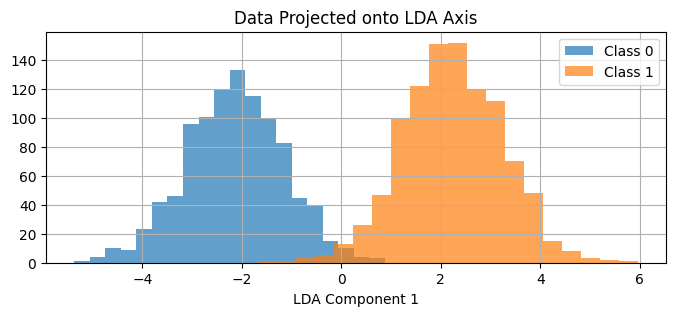

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Set seed
np.random.seed(0)

# Covariance matrix (same for both classes)
cov_matrix = np.array([[1, 0.75],
                       [0.75, 1]])

# Mean vectors for each class
mean_class1 = np.array([2, 2])
mean_class2 = np.array([6, 6])

# Generate data
n_samples = 1000
X_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, n_samples)
X_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, n_samples)

# Combine data
X = np.vstack((X_class1, X_class2))
y = np.array([0]*n_samples + [1]*n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Project data onto LDA component
X_lda = lda.transform(X)

# Plot 1D projection
plt.figure(figsize=(8, 3))
plt.hist(X_lda[y == 0], label='Class 0', alpha=0.7, bins=20)
plt.hist(X_lda[y == 1], label='Class 1', alpha=0.7, bins=20)
plt.title('Data Projected onto LDA Axis')
plt.xlabel('LDA Component 1')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
from sklearn.metrics import accuracy_score

# Predict labels using the trained LDA model
y_pred = lda.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy of LDA classifier: {accuracy * 100:.2f}%")

Accuracy of LDA classifier: 98.75%


In [82]:
# 5-fold cross-validation accuracy
cv_scores = cross_val_score(lda, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean * 100:.2f}")


5-Fold Cross-Validation Accuracy: 98.75


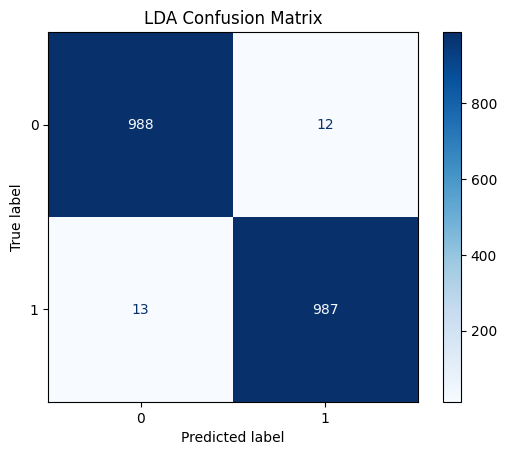

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = lda.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.grid(False)
plt.show()

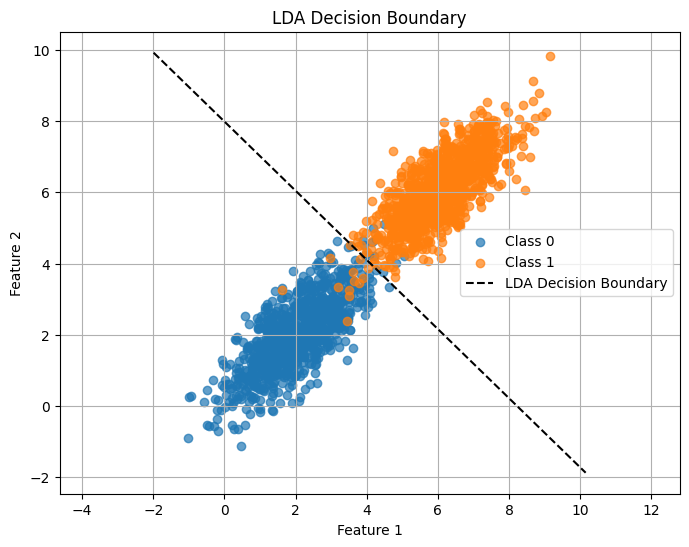

In [79]:
# Decision boundary
slope = -lda.coef_[0][0] / lda.coef_[0][1]
intercept = -lda.intercept_[0] / lda.coef_[0][1]
x_vals = np.linspace(X_test[:,0].min()-1, X[:,0].max()+1, 200)
decision_boundary = slope * x_vals + intercept

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_class2[:, 0], X_class2[:, 1], label='Class 1', alpha=0.7)
plt.plot(x_vals, decision_boundary, color='black', linestyle='--', label='LDA Decision Boundary')
plt.title('LDA Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Why This Dataset is Hard to Beat for LDA
- LDA works best because the data follows a Gaussian distribution, and both classes have equal covariance. This allows LDA to find the optimal linear boundary and project the classes to a lower dimension accordingly.

---

### Decision Tree with max depth 2

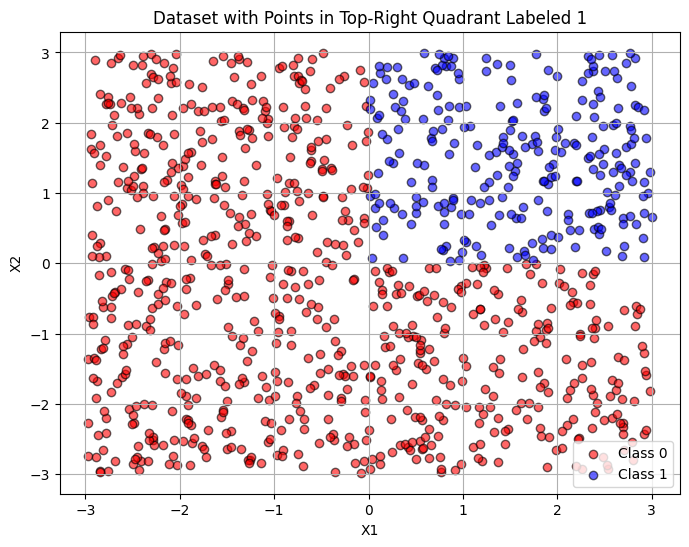

Decision Tree Test Accuracy: 100.00
5-Fold Cross-Validation Accuracy: 99.90


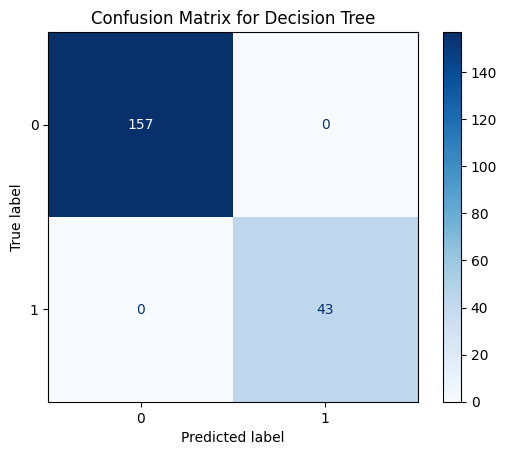

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate random data for X1 and X2
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)

# Create the labels based on the condition
y = ((X1 > 0) & (X2 > 0)).astype(int)  # Points in the top-right quadrant (X1 > 0, X2 > 0) are labeled 1

# Combine the features into a single matrix
X = np.vstack((X1, X2)).T

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset with Points in Top-Right Quadrant Labeled 1')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Train a decision tree with max_depth=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)

# Step 3: Calculate accuracy on test set
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {dt_accuracy * 100:.2f}")

# 5-fold cross-validation accuracy
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean * 100:.2f}")


# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


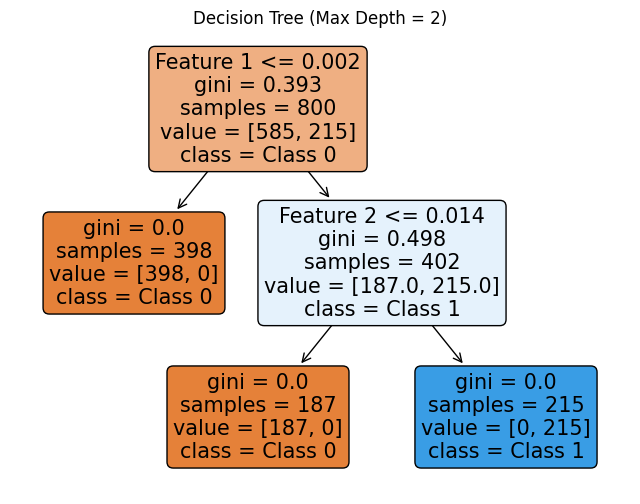

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(dt_model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Decision Tree (Max Depth = 2)")
plt.show()


### SVM Linear

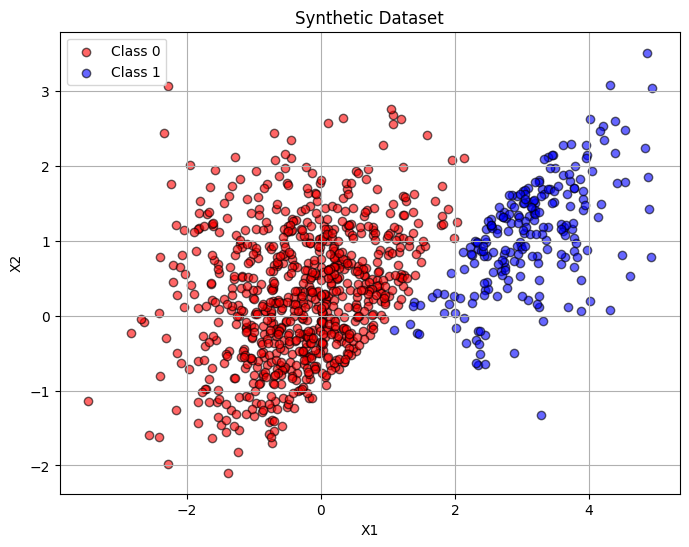

Decision Tree Test Accuracy: 1.000
5-Fold Cross-Validation Accuracy: 0.996


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Step 1: Generate dataset
n = 1000
X1 = np.random.randn(n)
X2 = np.random.randn(n)
y = (X1 - X2 > 1).astype(int)

# Optionally shift one class (class 1) to make it more separable
X1[y == 1] += 2.2
X2[y == 1] += 2

# Combine features into a single matrix
X = np.vstack((X1, X2)).T

# Step 2: Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Train a decision tree with max_depth=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC


dt_model = SVC(kernel='linear', random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Calculate accuracy on test set
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.3f}")

# Step 5: 5-Fold Cross Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
print(f"5-Fold Cross-Validation Accuracy: {cv_mean:.3f}")


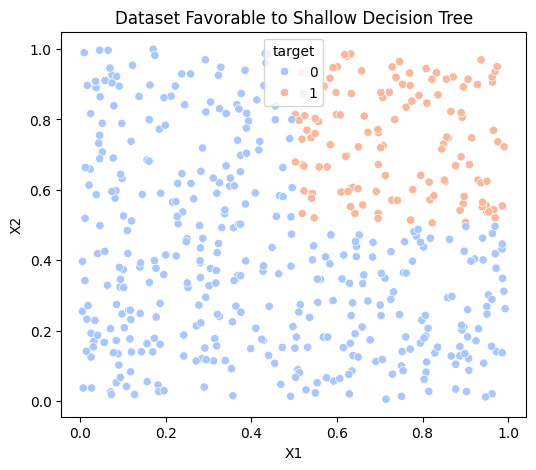

In [55]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create custom non-linear dataset
np.random.seed(42)
n = 500
X1 = np.random.rand(n)
X2 = np.random.rand(n)

# Simple rule:
# if X1 > 0.5 and X2 > 0.5 → class 1
# else → class 0
y = ((X1 > 0.5) & (X2 > 0.5)).astype(int)

X = pd.DataFrame({'X1': X1, 'X2': X2})
y = pd.Series(y, name='target')

# Visualize
plt.figure(figsize=(6, 5))
sns.scatterplot(data=X.assign(target=y), x="X1", y="X2", hue="target", palette="coolwarm")
plt.title("Dataset Favorable to Shallow Decision Tree")
plt.show()


### TASK 4


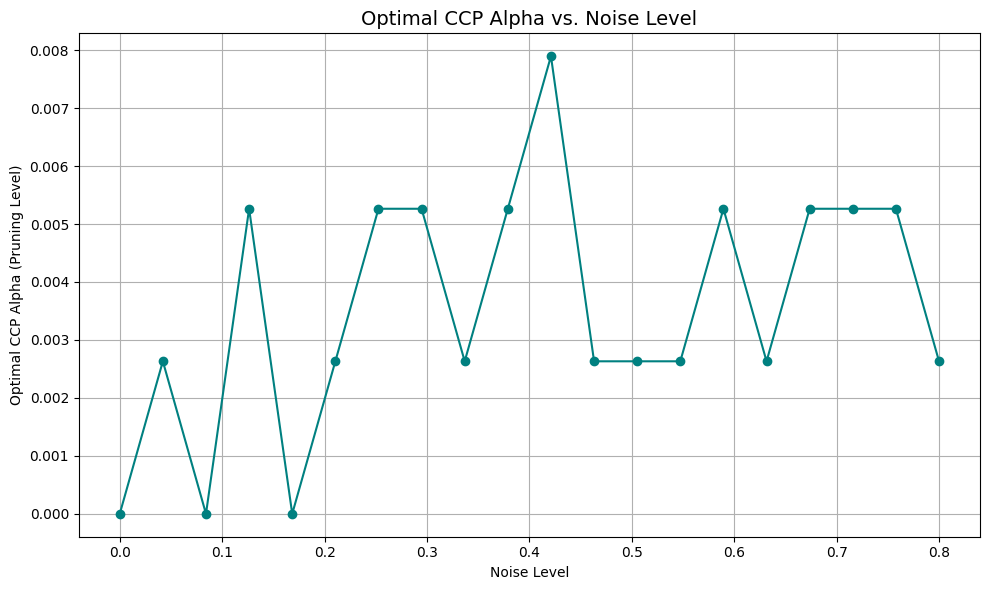

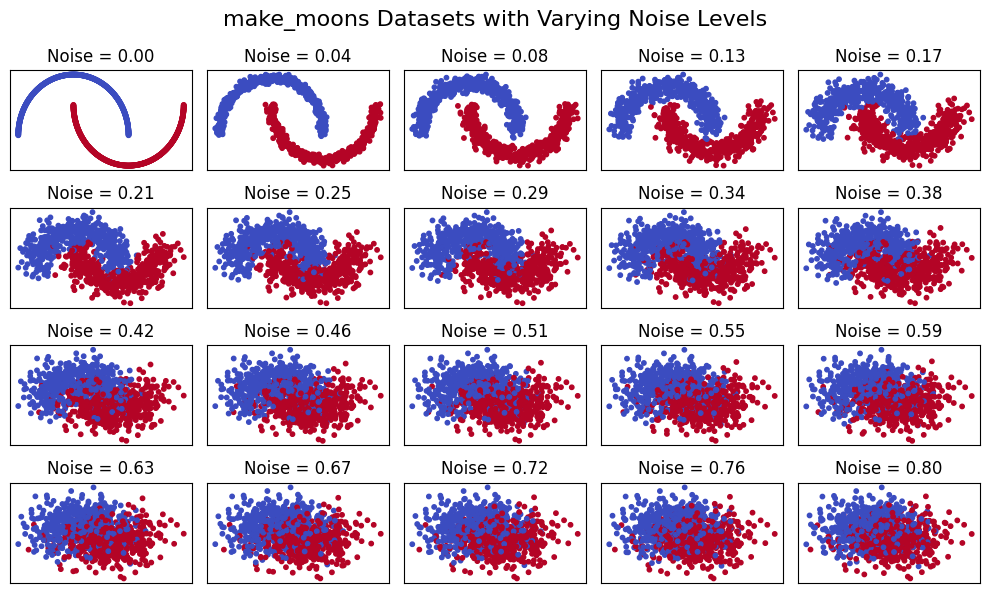

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Parameters
n_samples = 1000
noise_levels = np.linspace(0, 0.8, 20)  # Noise levels from 0 to 0.5
ccp_alpha_range = np.linspace(0, 0.05, 20)  # Candidate alpha values

best_alphas = []

# 1. Compute optimal ccp_alpha for each noise level
for noise in noise_levels:
    # Generate noisy moons
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    best_acc = 0
    best_alpha = 0

    for alpha in ccp_alpha_range:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))

        if acc > best_acc:
            best_acc = acc
            best_alpha = alpha

    best_alphas.append(best_alpha)

# 2. Plot noise level vs optimal ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, best_alphas, marker='o', color='teal')
plt.title("Optimal CCP Alpha vs. Noise Level", fontsize=14)
plt.xlabel("Noise Level")
plt.ylabel("Optimal CCP Alpha (Pruning Level)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot datasets at different noise levels
fig, axes = plt.subplots(4, 5, figsize=(10  , 6))
axes = axes.ravel()

for i, noise in enumerate(noise_levels):
    X, y = make_moons(n_samples=1000, noise=noise, random_state=42)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
    axes[i].set_title(f"Noise = {noise:.2f}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.suptitle("make_moons Datasets with Varying Noise Levels", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


### Task 5

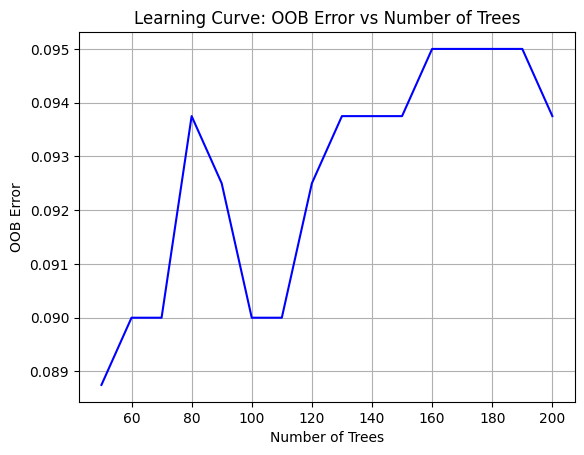

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate dataset
n_samples = 1000  # Number of samples
noise = 0.3  # Noise level
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store OOB errors
oob_errors = []
n_estimators_range = range(50, 201, 10)  # Number of trees to evaluate (from 10 to 200)

# Train Random Forests with different number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_errors.append(1 - rf.oob_score_)

# Plot the learning curve
plt.plot(n_estimators_range, oob_errors, label="OOB Error", color="blue")
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Learning Curve: OOB Error vs Number of Trees')
plt.grid(True)
plt.show()
